In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
import matplotlib.patheffects as path_effects
from highlight_text import HighlightText, ax_text, fig_text

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_excel('Chelsea_xG.xlsx')

df.head()

,Round,Result,GF,GA,Opponent,xG,xGA
0,1,L,0,4,Manchester Utd,0.8,2.3
1,2,D,1,1,Leicester City,1.4,0.8
2,3,W,3,2,Norwich City,2.1,1.2
3,4,D,2,2,Sheffield Utd,1.7,1.1
4,5,W,5,2,Wolves,1.9,1.6


In [4]:
df['roll_xG'] = df['xG'].rolling(5, center=False).mean()
df['roll_xGA'] = df['xGA'].rolling(5, center=False).mean()

df.head()

,Round,Result,GF,GA,Opponent,xG,xGA,roll_xG,roll_xGA
0,1,L,0,4,Manchester Utd,0.8,2.3,NaN,NaN
1,2,D,1,1,Leicester City,1.4,0.8,NaN,NaN
2,3,W,3,2,Norwich City,2.1,1.2,NaN,NaN
3,4,D,2,2,Sheffield Utd,1.7,1.1,NaN,NaN
4,5,W,5,2,Wolves,1.9,1.6,1.58,1.4


In [5]:
#Season 1
s1 = df[0:38]

#Season 2
s2 = df[38:]

In [6]:
s1

,Round,Result,GF,GA,Opponent,xG,xGA,roll_xG,roll_xGA
0,1,L,0,4,Manchester Utd,0.8,2.3,NaN,NaN
1,2,D,1,1,Leicester City,1.4,0.8,NaN,NaN
2,3,W,3,2,Norwich City,2.1,1.2,NaN,NaN
3,4,D,2,2,Sheffield Utd,1.7,1.1,NaN,NaN
4,5,W,5,2,Wolves,1.9,1.6,1.58,1.40
5,6,L,1,2,Liverpool,1.2,0.9,1.66,1.12
6,7,W,2,0,Brighton,3.2,0.5,2.02,1.06
7,8,W,4,1,Southampton,1.9,1.0,1.98,1.02
8,9,W,1,0,Newcastle Utd,1.9,0.3,2.02,0.86
9,10,W,4,2,Burnley,1.0,2.2,1.84,0.98


In [7]:
x1 = s1.Round.values
y1 = s1.xG.values

z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)

y2 = s1.xGA.values

z2 = np.polyfit(x1, y2, 1)
p2 = np.poly1d(z2)

x2 = s2.Round.values
y21 = s2.xG.values

z11 = np.polyfit(x2, y21, 1)
p11 = np.poly1d(z11)

y22 = s2.xGA.values

z22 = np.polyfit(x2, y22, 1)
p22 = np.poly1d(z22)

p22

poly1d([-0.02491979,  1.26256684])

Text(30, -0.35, 'By: Anish Nair\n(@AniNair14)')

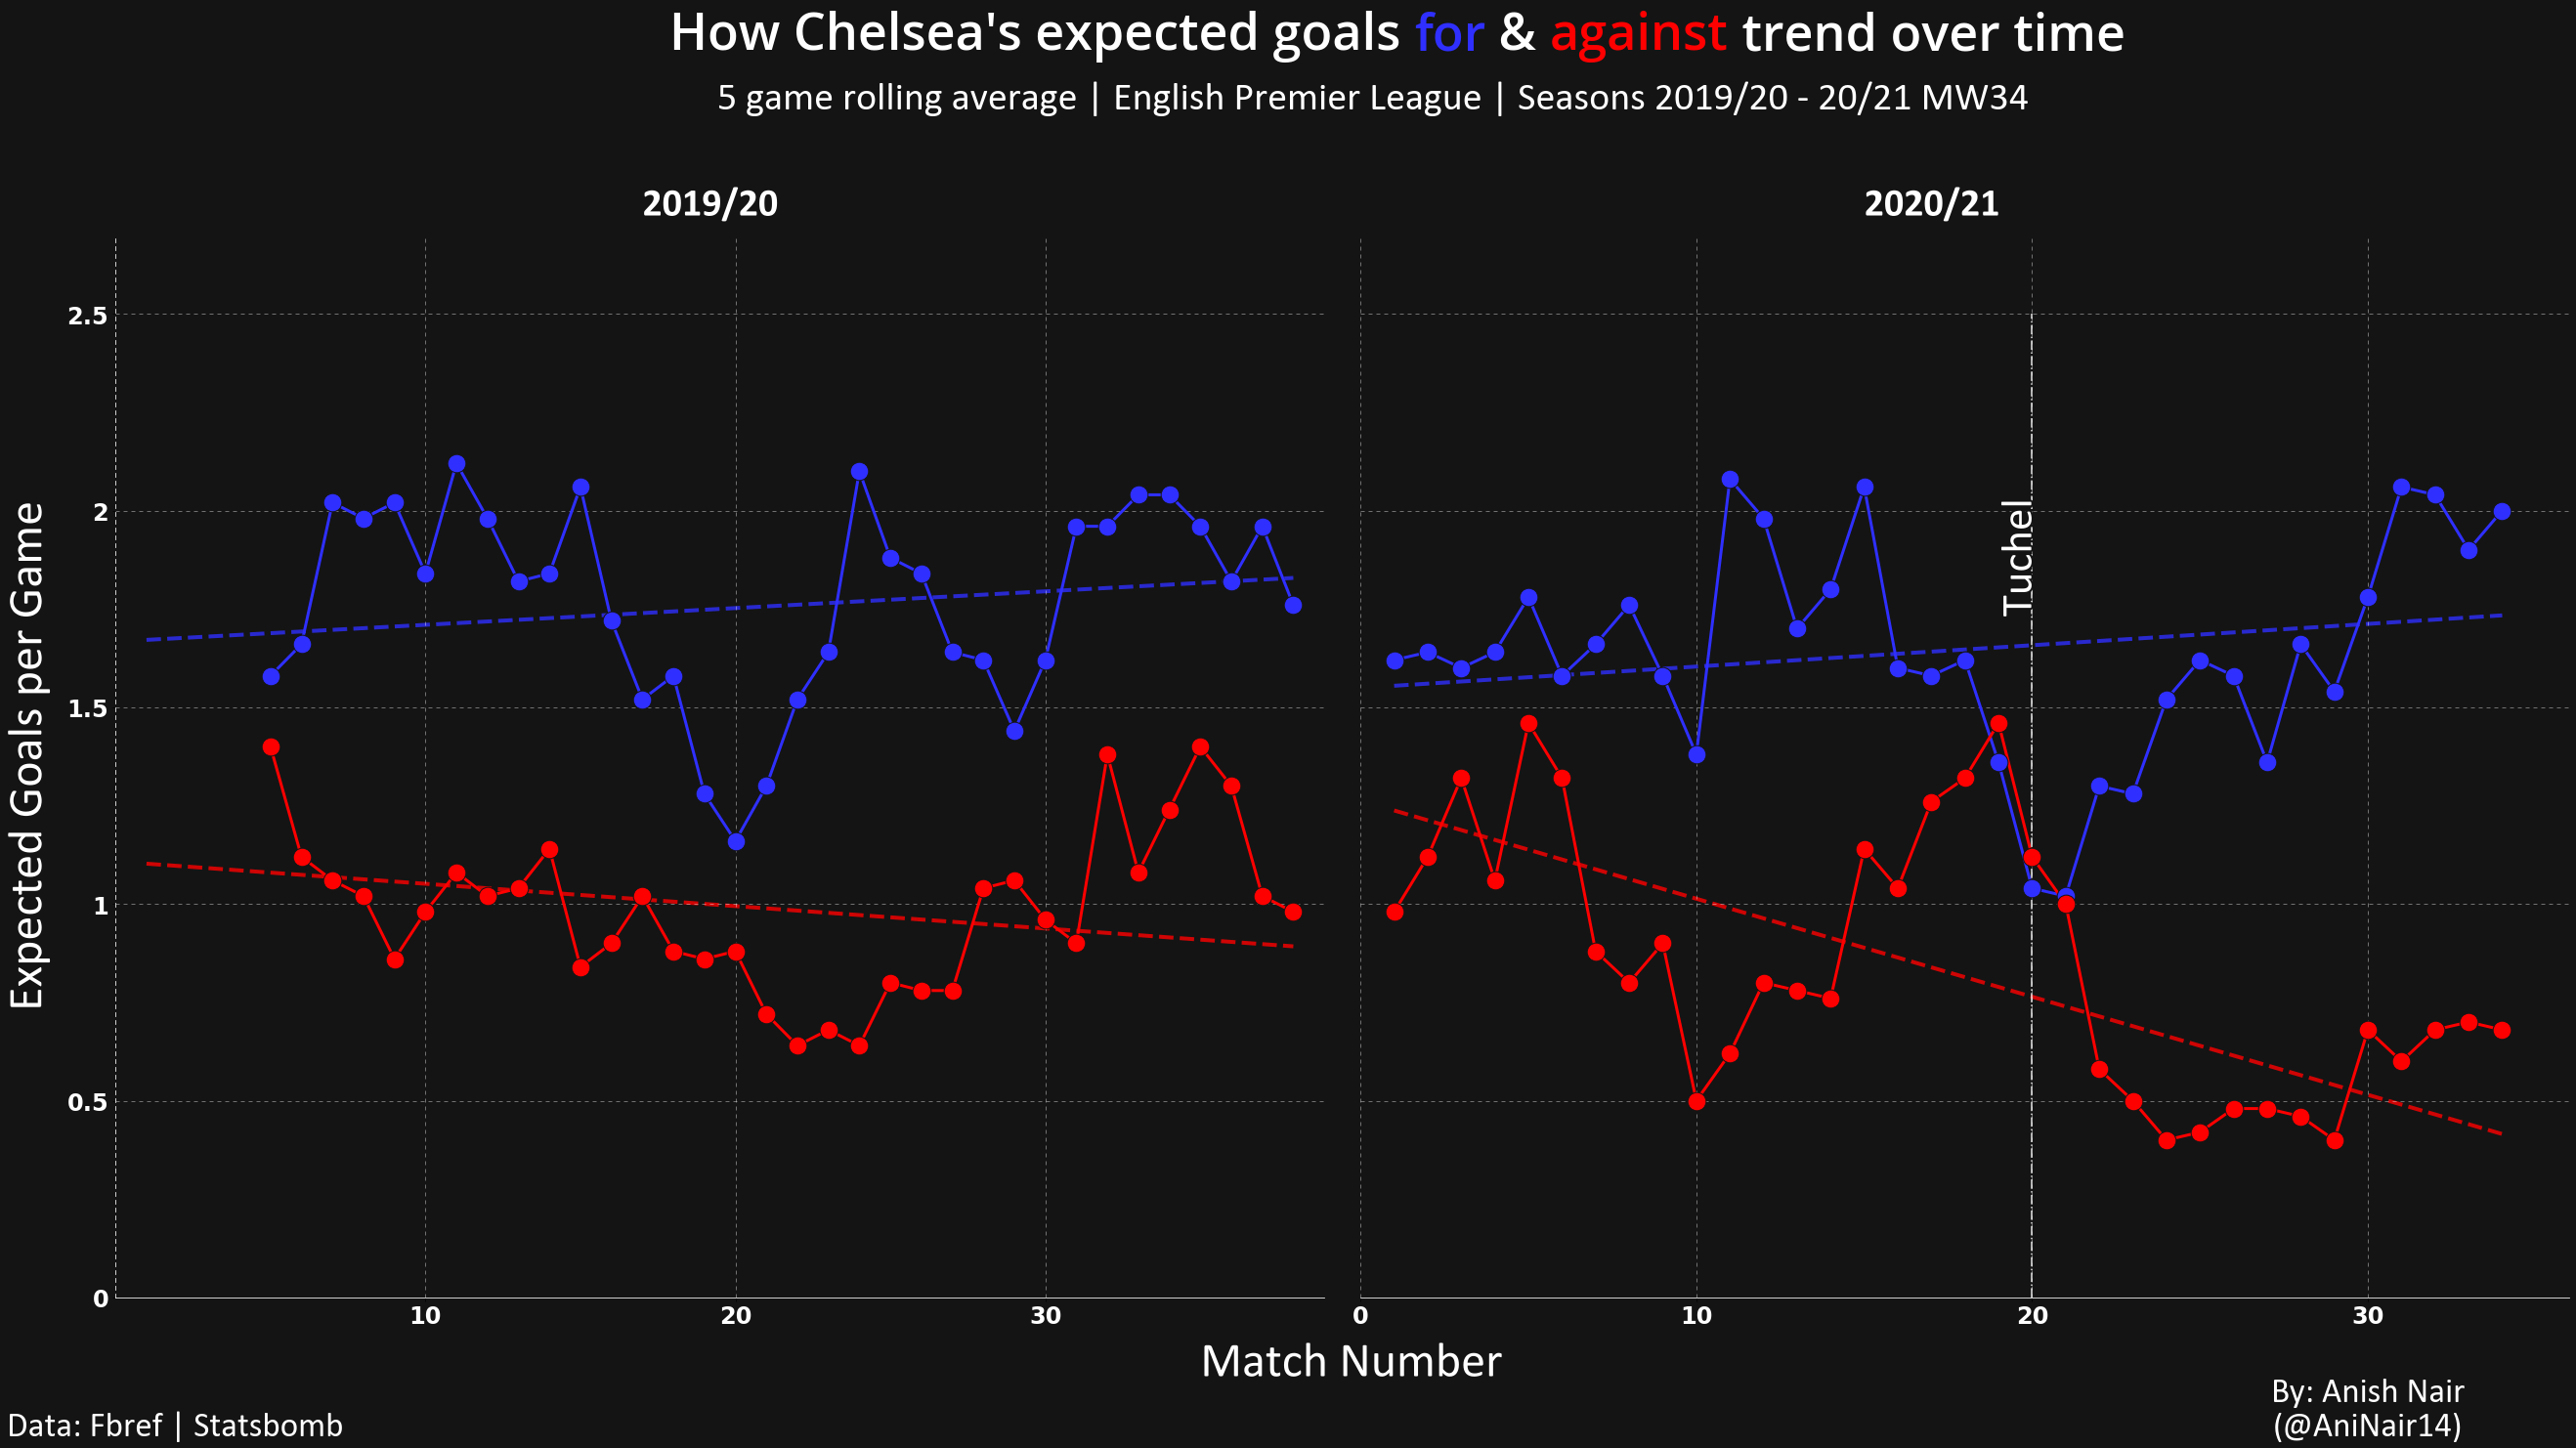

In [8]:
fig = plt.figure(figsize=(45, 20))

spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, wspace=0.03)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

fig.set_facecolor(bg)

ax1.patch.set_facecolor(bg)
ax2.patch.set_facecolor(bg)

ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')

ax2.spines['bottom'].set_color('white')

for side in ['right','left','top','bottom']:
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)

ax1.spines['left'].set_linestyle((0,(5,5)))
ax1.spines['right'].set_linestyle((0,(5,5)))

ax2.tick_params(left=False)
ax2.tick_params(labelleft=False)

xt = [10,20,30]
yt = [0,0.5,1,1.5,2,2.5]
xt2 = [0,10,20,30]

xlabels1 = ['10', '20', '30']
ylabels = ['0', '0.5', '1', '1.5', '2', '2.5']
xlabels2 = ['0', '10', '20', '30']

ax1.set_xticks(xt)
ax1.set_yticks(yt)
ax2.set_xticks(xt2)
ax2.set_yticks(yt)

ax1.set_xticklabels(xlabels1,color="white", size=24, fontweight="bold")
ax1.set_yticklabels(ylabels,color="white", size=24, fontweight="bold")

ax2.set_xticklabels(xlabels2,color="white", size=24, fontweight="bold")
ax2.set_yticklabels(ylabels,color="white", size=24, fontweight="bold")

ax1.set_xlim(0,39)
ax2.set_xlim(0,36)
ax1.set_ylim(0,2.7)
ax2.set_ylim(0,2.7)

ax1.grid(zorder=1,color="white",alpha=0.5, linestyle=((0,(5,5))))
ax2.grid(zorder=1,color="white",alpha=0.5, linestyle=((0,(5,5))))

#2019-20 Season:
ax1.scatter(s1['Round'], s1['roll_xG'], s=350, color='#2F2FFF', edgecolors=bg, zorder=3, linewidth=1)
ax1.plot(s1['Round'], s1['roll_xG'], color='#2F2FFF', zorder=2, lw=3, mec=bg)

ax1.scatter(s1['Round'], s1['roll_xGA'], s=350, color='#FF0000', edgecolors=bg, zorder=3, linewidth=1)
ax1.plot(s1['Round'], s1['roll_xGA'], color='#FF0000', zorder=2, lw=3, mec=bg)

ax1.plot(x1, p1(x1), color='#2F2FFF', ls='--', lw=4, mec=bg, alpha=0.8, zorder=1)

ax1.plot(x1, p2(x1), color='#FF0000', ls='--', lw=4, mec=bg, alpha=0.8, zorder=1)

#2020-21 Season:
ax2.scatter(s2['Round'], s2['roll_xG'], s=350, color='#2F2FFF', edgecolors=bg, zorder=3, linewidth=1)
ax2.plot(s2['Round'], s2['roll_xG'], color='#2F2FFF', zorder=2, lw=3, mec=bg)

ax2.scatter(s2['Round'], s2['roll_xGA'], s=350, color='#FF0000', edgecolors=bg, zorder=3, linewidth=1)
ax2.plot(s2['Round'], s2['roll_xGA'], color='#FF0000', zorder=2, lw=3, mec=bg)

ax2.plot(x2, p11(x2), color='#2F2FFF', ls='--', lw=4, mec=bg, alpha=0.8, zorder=1)

ax2.plot([20,20], [0,2.5], color='white', alpha=0.9, zorder=2, ls= '-.')

ax2.plot(x2, p22(x2), color='#FF0000', ls='--', lw=4, mec=bg, alpha=0.8, zorder=1)

t = ax2.text(19.1,1.75, "Tuchel", rotation=90, color='white', size=45, fontfamily=body_font, zorder=2)

t.set_path_effects([path_effects.withStroke(linewidth=4,foreground=bg)])

t1 = ax1.text(-3.5,0.75,"Expected Goals per Game", rotation=90, color='white', size=50, fontfamily=body_font, zorder=2)
t1.set_path_effects([path_effects.withStroke(linewidth=4,foreground=bg)])

t2 = ax1.text(35,-0.2, "Match Number", color='white', size=50, fontfamily=body_font, zorder=2)
t2.set_path_effects([path_effects.withStroke(linewidth=4,foreground=bg)])

title =\
fig_text(s = "How Chelsea's expected goals <for> & <against> trend over time",
        x = 0.3,
        y = 1.04,
        color = 'white',
        fontfamily = title_font,
        fontsize = 52,
        highlight_textprops=[{'color': '#2F2FFF'},
                             {'color': '#FF0000'}],
        fontweight = 'bold')


t3 = ax1.text(17,2.75, "2019/20", color='white', size=40, fontweight='bold', fontfamily=body_font, zorder=2)
t3.set_path_effects([path_effects.withStroke(linewidth=4,foreground=bg)])

t4 = ax2.text(15,2.75, "2020/21", color='white', size=40, fontweight='bold', fontfamily=body_font, zorder=2)
t4.set_path_effects([path_effects.withStroke(linewidth=4,foreground=bg)])

fig.text(0.315,0.97, "5 game rolling average | English Premier League | Seasons 2019/20 - 20/21 MW34", color='white', size=40, fontfamily=body_font, zorder=2)

ax1.text(-3.5,-0.35, "Data: Fbref | Statsbomb", color='white', size=35, fontfamily=body_font)

ax2.text(30,-0.35, "By: Anish Nair\n(@AniNair14)", ha='center', color='white', size=35, fontfamily=body_font)

# plt.savefig("Chelsea_Trend.jpg",facecolor=bg,bbox_inches="tight", dpi=700)